In [2]:
import hhgen.io as io
import hhgen.utils as utils
import matplotlib.pyplot as plt
import numpy as np
import skhep.math as skp

Welcome to ROOTaaS 6.06/05


In [3]:
files = ! ls /t3home/musella/Analysis/HH_8_0_28/src/HHbbgg_ETH/Flashgg/work/gen_analysis/*madgraph.root

In [4]:
reload(io)
def get_data(fname,proc):
    tdir = 'genDiphotonDumper/trees'

    untagged = tdir+'/'+proc+'_13TeV_NoTag_0'
    tagged = tdir+'/'+proc+'_13TeV_DoubleHTag_%d'

    return io.read_trees(fname,untagged,tagged,12) 

In [5]:
#hgg=H to 2 photons
#hbb=H to 2 b jets
#hh=H to 2 Higgs
reload(utils)
def calc_features(df):
    for part in "leadPho","subleadPho","leadJet","subleadJet":
        utils.calc_p4extra(df,part) #calculating pt, eta, phi, m for each 
    utils.calc_sump4(df,"hgg","leadPho","subleadPho") #calculating pt, eta, phi, m for sum of 2 photons
    utils.calc_sump4(df,"hbb","leadJet","subleadJet") #calculating pt, eta, phi, m for sum of 2 b jets
    utils.calc_sump4(df,"hh","hbb","hgg") #calculating pt, eta, phi, m for sum of 2 Higgs
    
    df["mtilda_x"]=df["hh_m"]-df["mgg"]-df["mbb"]+250.0 
    df["hgg_pt_hh_m"]=df["hgg_pt"]/df["hh_m"]
    df["hbb_pt_hh_m"]=df["hbb_pt"]/df["hh_m"]
    
    utils.calc_cos_theta_cs(df) #angle in Collins Sopper frame
    utils.calc_cos_theta(df,"hbb","leadJet") #helicity angles
    utils.calc_cos_theta(df,"hgg","leadPho")

In [6]:
import os

dfs = {}
for ifil in files:
    fname = os.path.basename(ifil) #output_GluGluToHHTo2B2G_node_10_13TeV-madgraph.root
    proc = fname.replace("output_","").replace(".root","").replace("-","_") #GluGluToHHTo2B2G_node_10_13TeV_madgraph
    df = get_data(ifil,proc)
    proc = proc.replace("GluGluToHHTo2B2G_","").replace("_13TeV_madgraph","")#node_10
    calc_features(df)
    dfs[proc] = df

In [7]:
#dfs["node_SM"].columns

In [65]:
plt.figure(1)
dfs["node_2"].hh_m.hist(range=[250,1000],bins=150)
plt.ylabel("Events")
plt.xlabel("hh$_m$ (in GeV/c$^2$)")
#plt.show()
plt.savefig("hh_m.png")

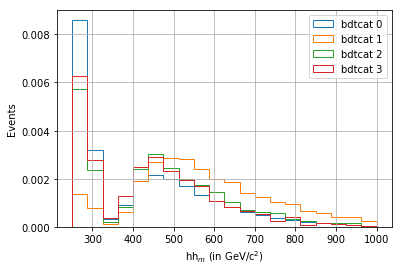

In [9]:
plt.figure(2)
gbybdtcat=dfs["node_2"].groupby('bdtcat')
for icat in range(0,4):
    dfc=gbybdtcat.get_group(icat)
    dfc.hh_m.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="bdtcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_m$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_m_category_bdt.png")

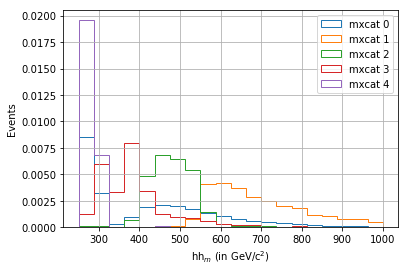

In [10]:
plt.figure(3)
gbymxcat=dfs["node_2"].groupby('mxcat')
for icat in range(0,5):
    dfc=gbymxcat.get_group(icat)
    dfc.hh_m.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="mxcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_m$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_m_category_mx.png")

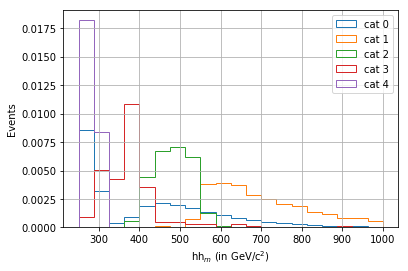

In [11]:
plt.figure(4)
gbycat=dfs["node_2"].groupby('cat')
for icat in range(0,5):
    dfc=gbycat.get_group(icat)
    dfc.hh_m.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_m$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_m_category_1-4.png")

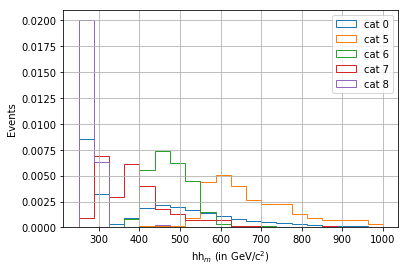

In [12]:
plt.figure(5)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hh_m.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(5,9):
    dfc=gbycat.get_group(icat)
    dfc.hh_m.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_m$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_m_category_5-8.png")

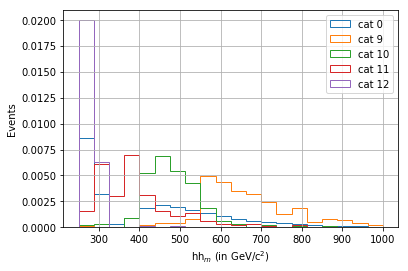

In [13]:
plt.figure(6)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hh_m.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(9,13):
    dfc=gbycat.get_group(icat)
    dfc.hh_m.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_m$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_m_category_9-12.png")

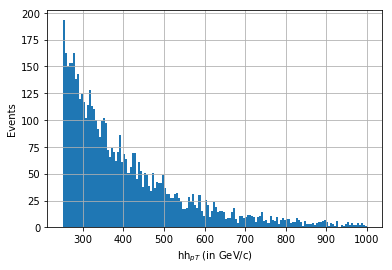

In [14]:
plt.figure(7)
dfs["node_2"].hh_pt.hist(range=[250,1000],bins=150)
plt.ylabel("Events")
plt.xlabel("hh$_{pT}$ (in GeV/c)")
plt.show()
#plt.savefig("hh_pt.png")

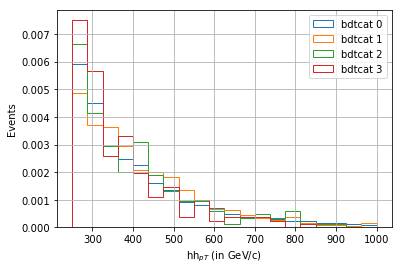

In [15]:
plt.figure(8)
gbybdtcat=dfs["node_2"].groupby('bdtcat')
for icat in range(0,4):
    dfc=gbybdtcat.get_group(icat)
    dfc.hh_pt.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="bdtcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_{pT}$ (in GeV/c)")
plt.legend()
plt.show()
#plt.savefig("hh_pt_category_bdt.png")

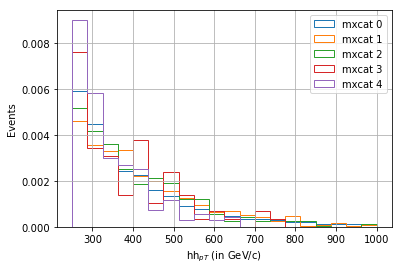

In [16]:
plt.figure(9)
gbymxcat=dfs["node_2"].groupby('mxcat')
for icat in range(0,5):
    dfc=gbymxcat.get_group(icat)
    dfc.hh_pt.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="mxcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_{pT}$ (in GeV/c)")
plt.legend()
plt.show()
#plt.savefig("hh_pt_category_mx.png")

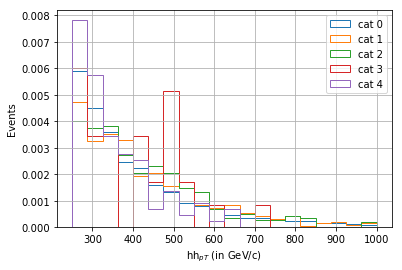

In [17]:
plt.figure(10)
gbycat=dfs["node_2"].groupby('cat')
for icat in range(0,5):
    dfc=gbycat.get_group(icat)
    dfc.hh_pt.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_{pT}$ (in GeV/c)")
plt.legend()
plt.show()
#plt.savefig("hh_pt_category_1-4.png")

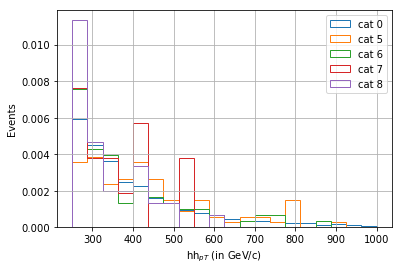

In [18]:
plt.figure(11)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hh_pt.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(5,9):
    dfc=gbycat.get_group(icat)
    dfc.hh_pt.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_{pT}$ (in GeV/c)")
plt.legend()
plt.show()
#plt.savefig("hh_pt_category_5-8.png")

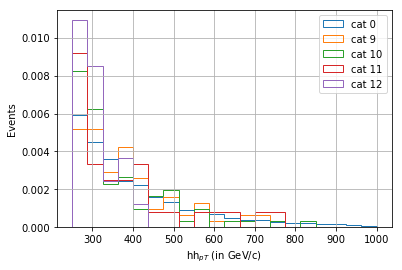

In [19]:
plt.figure(12)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hh_pt.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(9,13):
    dfc=gbycat.get_group(icat)
    dfc.hh_pt.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_{pT}$ (in GeV/c)")
plt.legend()
plt.show()
#plt.savefig("hh_pt_category_9-12.png")

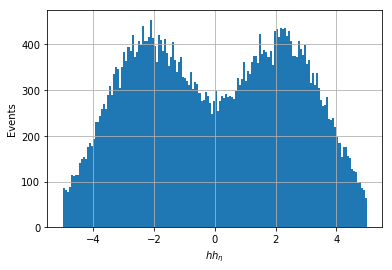

In [20]:
plt.figure(13)
dfs["node_2"].hh_eta.hist(range=[-5,5],bins=150)
plt.ylabel("Events")
plt.xlabel("$hh_{\eta}$")
plt.show()
#plt.savefig("hh_eta.png")

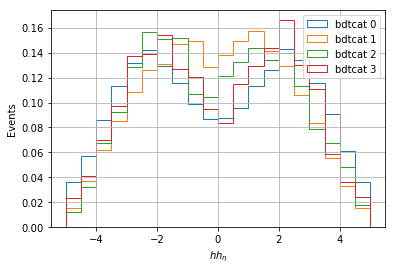

In [21]:
plt.figure(14)
gbybdtcat=dfs["node_2"].groupby('bdtcat')
for icat in range(0,4):
    dfc=gbybdtcat.get_group(icat)
    dfc.hh_eta.hist(range=[-5,5],bins=20,normed=True,histtype="step",label="bdtcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$hh_{\eta}$")
plt.legend()
plt.show()
#plt.savefig("hh_eta_category_bdt.png")

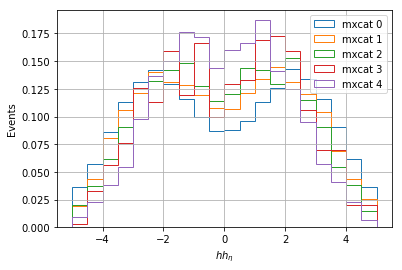

In [22]:
plt.figure(15)
gbymxcat=dfs["node_2"].groupby('mxcat')
for icat in range(0,5):
    dfc=gbymxcat.get_group(icat)
    dfc.hh_eta.hist(range=[-5,5],bins=20,normed=True,histtype="step",label="mxcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$hh_{\eta}$")
plt.legend()
plt.show()
#plt.savefig("hh_eta_category_mx.png")

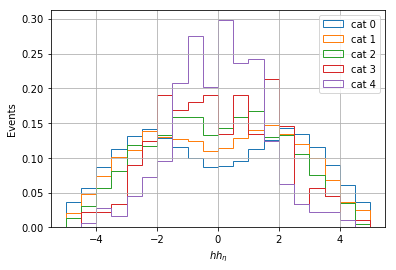

In [23]:
plt.figure(16)
gbycat=dfs["node_2"].groupby('cat')
for icat in range(0,5):
    dfc=gbycat.get_group(icat)
    dfc.hh_eta.hist(range=[-5,5],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$hh_{\eta}$")
plt.legend()
plt.show()
#plt.savefig("hh_eta_category_1-4.png")

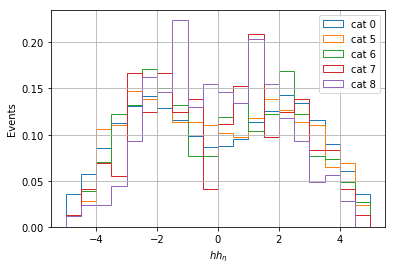

In [24]:
plt.figure(17)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hh_eta.hist(range=[-5,5],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(5,9):
    dfc=gbycat.get_group(icat)
    dfc.hh_eta.hist(range=[-5,5],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$hh_{\eta}$")
plt.legend()
plt.show()
#plt.savefig("hh_eta_category_5-8.png")

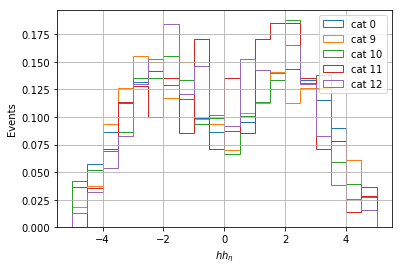

In [25]:
plt.figure(18)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hh_eta.hist(range=[-5,5],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(9,13):
    dfc=gbycat.get_group(icat)
    dfc.hh_eta.hist(range=[-5,5],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$hh_{\eta}$")
plt.legend()
plt.show()
#plt.savefig("hh_eta_category_9-12.png")

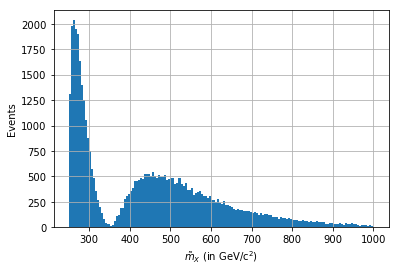

In [26]:
plt.figure(19)
dfs["node_2"].mtilda_x.hist(range=[250,1000],bins=150)
plt.ylabel("Events")
plt.xlabel("$\~{m}_X$ (in GeV/c$^2$)")
plt.show()
#plt.savefig("hh_mtilda_x.png")

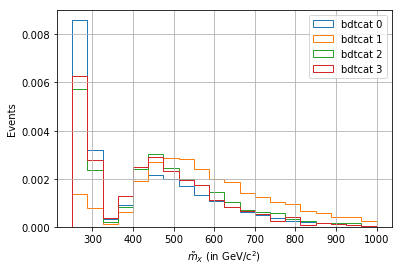

In [27]:
plt.figure(20)
gbybdtcat=dfs["node_2"].groupby('bdtcat')
for icat in range(0,4):
    dfc=gbybdtcat.get_group(icat)
    dfc.mtilda_x.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="bdtcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$\~{m}_X$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_mtilda_x_category_bdt.png")

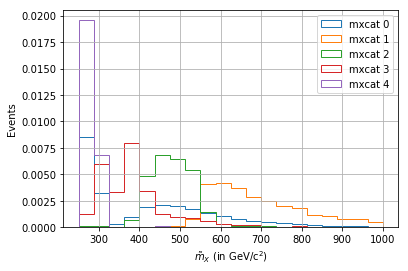

In [28]:
plt.figure(21)
gbymxcat=dfs["node_2"].groupby('mxcat')
for icat in range(0,5):
    dfc=gbymxcat.get_group(icat)
    dfc.mtilda_x.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="mxcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$\~{m}_X$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_mtilda_x_category_mx.png")

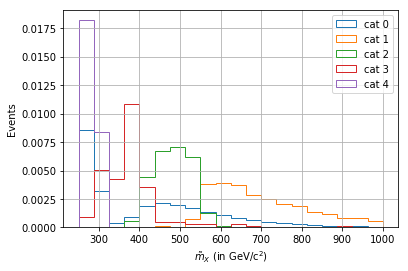

In [29]:
plt.figure(22)
gbycat=dfs["node_2"].groupby('cat')
for icat in range(0,5):
    dfc=gbycat.get_group(icat)
    dfc.mtilda_x.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$\~{m}_X$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_mtilda_x_category_1-4.png")

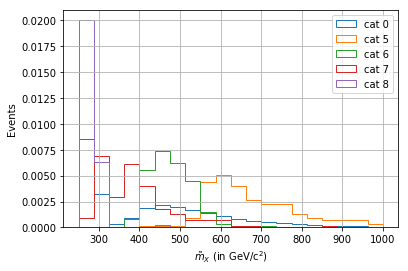

In [30]:
plt.figure(23)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.mtilda_x.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(5,9):
    dfc=gbycat.get_group(icat)
    dfc.mtilda_x.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$\~{m}_X$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_mtilda_x_category_5-8.png")

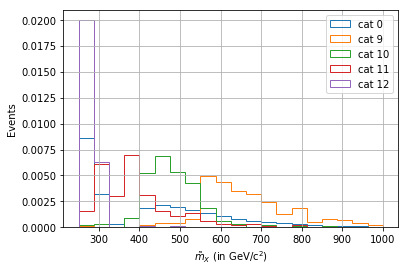

In [31]:
plt.figure(24)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.mtilda_x.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(9,13):
    dfc=gbycat.get_group(icat)
    dfc.mtilda_x.hist(range=[250,1000],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("$\~{m}_X$ (in GeV/c$^2$)")
plt.legend()
plt.show()
#plt.savefig("hh_mtilda_x_category_9-12.png")

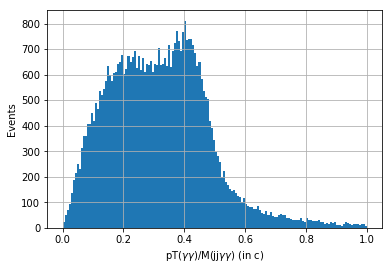

In [32]:
plt.figure(25)
dfs["node_2"].hgg_pt_hh_m.hist(range=[0,1],bins=150)
plt.ylabel("Events")
plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
plt.show()
#plt.savefig("hgg_pt_hh_m.png")

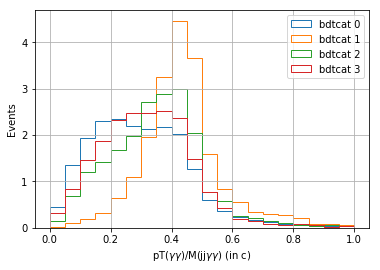

In [33]:
plt.figure(26)
gbybdtcat=dfs["node_2"].groupby('bdtcat')
for icat in range(0,4):
    dfc=gbybdtcat.get_group(icat)
    dfc.hgg_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="bdtcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hgg_pt_hh_m_category_bdt.png")

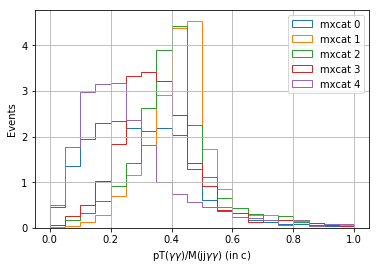

In [34]:
plt.figure(27)
gbymxcat=dfs["node_2"].groupby('mxcat')
for icat in range(0,5):
    dfc=gbymxcat.get_group(icat)
    dfc.hgg_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="mxcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hgg_pt_hh_m_category_mx.png")

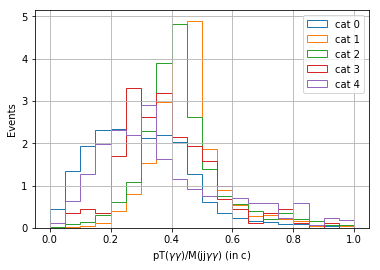

In [35]:
plt.figure(28)
gbycat=dfs["node_2"].groupby('cat')
for icat in range(0,5):
    dfc=gbycat.get_group(icat)
    dfc.hgg_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hgg_pt_hh_m_category_1-4.png")

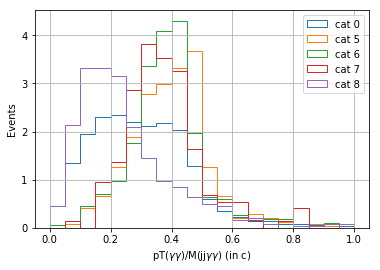

In [36]:
plt.figure(29)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hgg_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(5,9):
    dfc=gbycat.get_group(icat)
    dfc.hgg_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hgg_pt_hh_m_category_5-8.png")

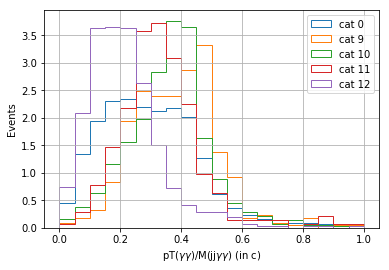

In [37]:
plt.figure(30)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hgg_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(9,13):
    dfc=gbycat.get_group(icat)
    dfc.hgg_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hgg_pt_hh_m_category_9-12.png")

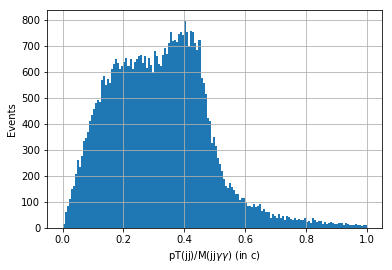

In [38]:
plt.figure(31)
dfs["node_2"].hbb_pt_hh_m.hist(range=[0,1],bins=150)
plt.ylabel("Events")
plt.xlabel("pT(jj)/M(jj$\gamma\gamma$) (in c)")
plt.show()
#plt.savefig("hbb_pt_hh_m.png")

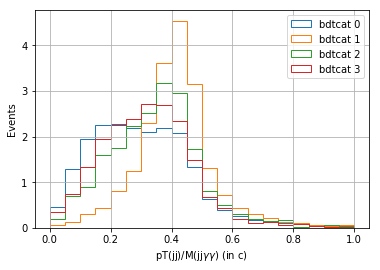

In [39]:
plt.figure(32)
gbybdtcat=dfs["node_2"].groupby('bdtcat')
for icat in range(0,4):
    dfc=gbybdtcat.get_group(icat)
    dfc.hbb_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="bdtcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT(jj)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hbb_pt_hh_m_category_bdt.png")

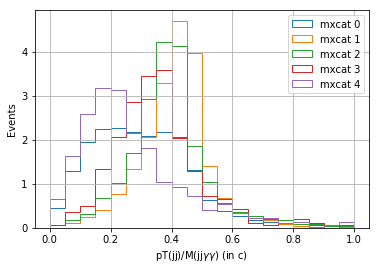

In [40]:
plt.figure(33)
gbymxcat=dfs["node_2"].groupby('mxcat')
for icat in range(0,5):
    dfc=gbymxcat.get_group(icat)
    dfc.hbb_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="mxcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT(jj)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hbb_pt_hh_m_category_mx.png")

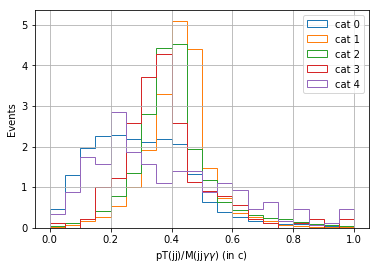

In [41]:
plt.figure(34)
gbycat=dfs["node_2"].groupby('cat')
for icat in range(0,5):
    dfc=gbycat.get_group(icat)
    dfc.hbb_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT(jj)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hbb_pt_hh_m_category_1-4.png")

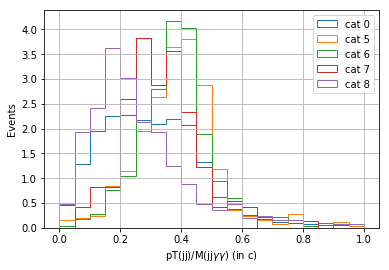

In [42]:
plt.figure(35)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hbb_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(5,9):
    dfc=gbycat.get_group(icat)
    dfc.hbb_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT(jj)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hbb_pt_hh_m_category_5-8.png")

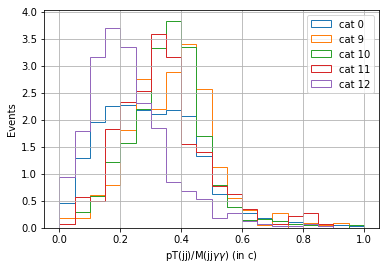

In [43]:
plt.figure(36)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
dfc.hbb_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(9,13):
    dfc=gbycat.get_group(icat)
    dfc.hbb_pt_hh_m.hist(range=[0,1],bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("pT(jj)/M(jj$\gamma\gamma$) (in c)")
plt.legend()
plt.show()
#plt.savefig("hbb_pt_hh_m_category_9-12.png")

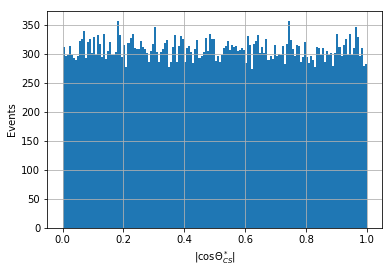

In [44]:
plt.figure(37)
np.abs(dfs["node_2"].cos_theta_cs).hist(bins=150)
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{CS}^*$|")
plt.show()
#plt.savefig("cos_theta_cs.png")

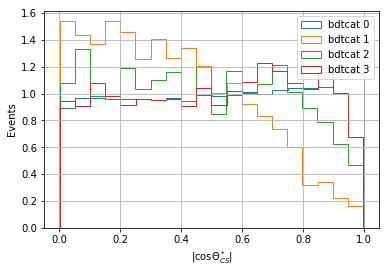

In [45]:
plt.figure(38)
gbybdtcat=dfs["node_2"].groupby('bdtcat')
for icat in range(0,4):
    dfc=gbybdtcat.get_group(icat)
    np.abs(dfc.cos_theta_cs).hist(bins=20,normed=True,histtype="step",label="bdtcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{CS}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_cs_category_bdt.png")

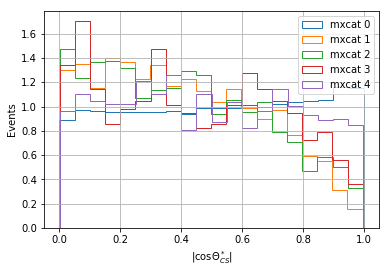

In [46]:
plt.figure(39)
gbymxcat=dfs["node_2"].groupby('mxcat')
for icat in range(0,5):
    dfc=gbymxcat.get_group(icat)
    np.abs(dfc.cos_theta_cs).hist(bins=20,normed=True,histtype="step",label="mxcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{CS}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_cs_category_mx.png")

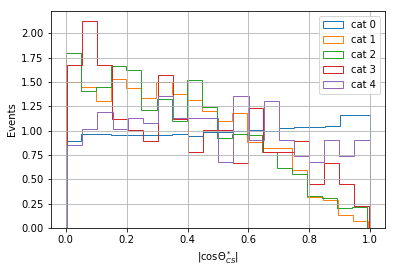

In [47]:
plt.figure(40)
gbycat=dfs["node_2"].groupby('cat')
for icat in range(0,5):
    dfc=gbycat.get_group(icat)
    np.abs(dfc.cos_theta_cs).hist(bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{CS}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_cs_category_1-4.png")

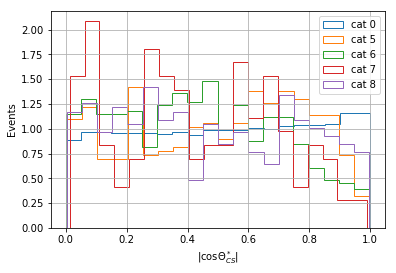

In [48]:
plt.figure(41)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
np.abs(dfc.cos_theta_cs).hist(bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(5,9):
    dfc=gbycat.get_group(icat)
    np.abs(dfc.cos_theta_cs).hist(bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{CS}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_cs_category_5-8.png")

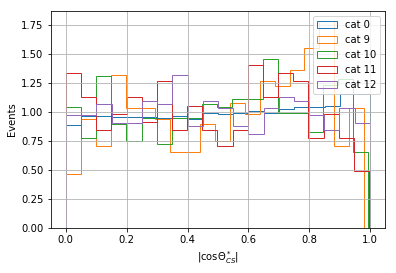

In [49]:
plt.figure(42)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
np.abs(dfc.cos_theta_cs).hist(bins=20,normed=True,histtype="step",label="cat %d" % 0)
for icat in range(9,13):
    dfc=gbycat.get_group(icat)
    np.abs(dfc.cos_theta_cs).hist(bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{CS}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_cs_category_9-12.png")

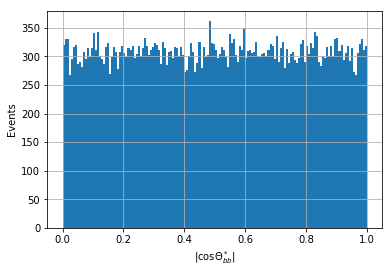

In [50]:
plt.figure(43)
np.abs(dfs["node_2"].cos_theta_hbb).hist(bins=150)
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{bb}^*$|")
plt.show()
#plt.savefig("cos_theta_bb.png")

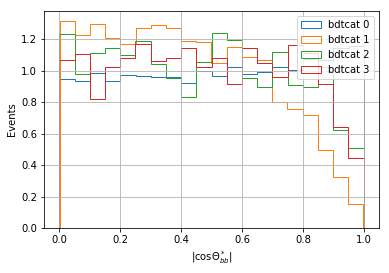

In [51]:
plt.figure(44)
gbybdtcat=dfs["node_2"].groupby('bdtcat')
for icat in range(0,4):
    dfc=gbybdtcat.get_group(icat)
    np.abs(dfc.cos_theta_hbb).hist(bins=20,normed=True,histtype="step",label="bdtcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{bb}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_bb_category_bdt.png")

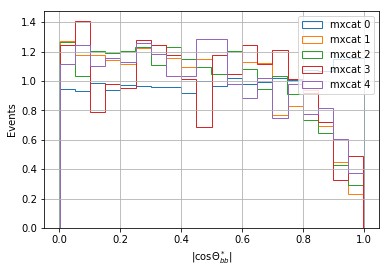

In [52]:
plt.figure(45)
gbymxcat=dfs["node_2"].groupby('mxcat')
for icat in range(0,5):
    dfc=gbymxcat.get_group(icat)
    np.abs(dfc.cos_theta_hbb).hist(bins=20,normed=True,histtype="step",label="mxcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{bb}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_bb_category_mx.png")

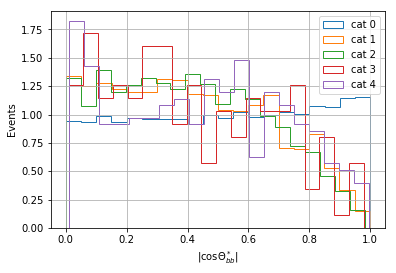

In [53]:
plt.figure(46)
gbycat=dfs["node_2"].groupby('cat')
for icat in range(0,5):
    dfc=gbycat.get_group(icat)
    np.abs(dfc.cos_theta_hbb).hist(bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{bb}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_bb_category_1-4.png")

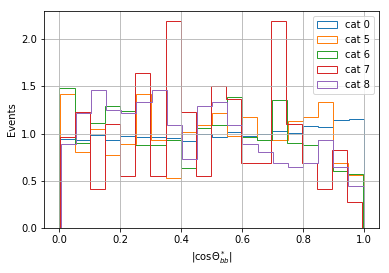

In [54]:
plt.figure(47)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
np.abs(dfc.cos_theta_hbb).hist(bins=20,normed=True,histtype="step",label="cat %d" % 0) 
for icat in range(5,9):
    dfc=gbycat.get_group(icat)
    np.abs(dfc.cos_theta_hbb).hist(bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{bb}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_bb_category_5-8.png")

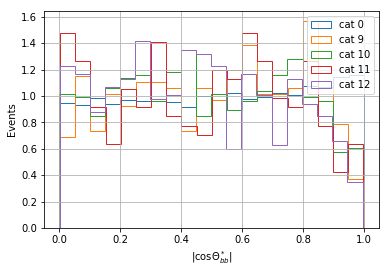

In [55]:
plt.figure(48)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
np.abs(dfc.cos_theta_hbb).hist(bins=20,normed=True,histtype="step",label="cat %d" % 0) 
for icat in range(9,13):
    dfc=gbycat.get_group(icat)
    np.abs(dfc.cos_theta_hbb).hist(bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{bb}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_bb_category_9-12.png")

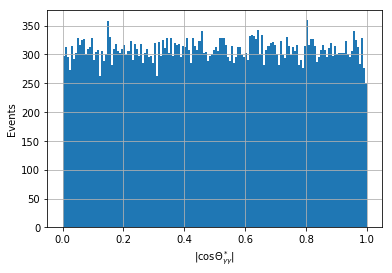

In [56]:
plt.figure(49)
np.abs(dfs["node_2"].cos_theta_hgg).hist(bins=150)
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
plt.show()
#plt.savefig("cos_theta_gg.png")

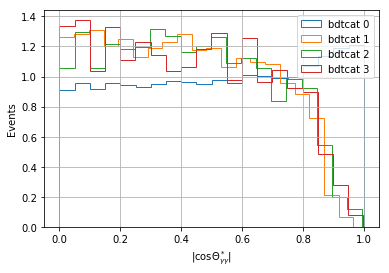

In [57]:
plt.figure(50)
gbybdtcat=dfs["node_2"].groupby('bdtcat')
for icat in range(0,4):
    dfc=gbybdtcat.get_group(icat)
    np.abs(dfc.cos_theta_hgg).hist(bins=20,normed=True,histtype="step",label="bdtcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_gg_category_bdt.png")

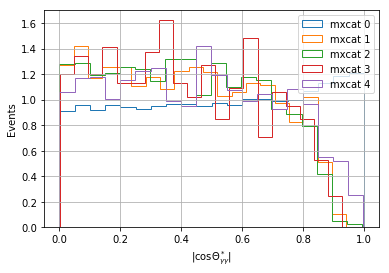

In [58]:
plt.figure(51)
gbymxcat=dfs["node_2"].groupby('mxcat')
for icat in range(0,5):
    dfc=gbymxcat.get_group(icat)
    np.abs(dfc.cos_theta_hgg).hist(bins=20,normed=True,histtype="step",label="mxcat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_gg_category_mx.png")

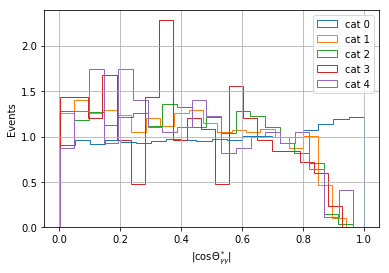

In [59]:
plt.figure(52)
gbycat=dfs["node_2"].groupby('cat')
for icat in range(0,5):
    dfc=gbycat.get_group(icat)
    np.abs(dfc.cos_theta_hgg).hist(bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_gg_category_1-4.png")

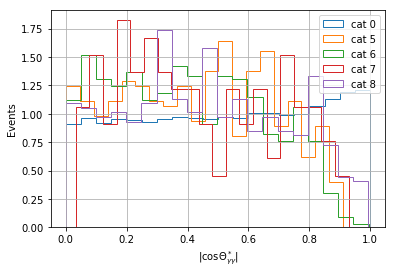

In [60]:
plt.figure(53)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
np.abs(dfc.cos_theta_hgg).hist(bins=20,normed=True,histtype="step",label="cat %d" % 0) 
for icat in range(5,9):
    dfc=gbycat.get_group(icat)
    np.abs(dfc.cos_theta_hgg).hist(bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_gg_category_5-8.png")

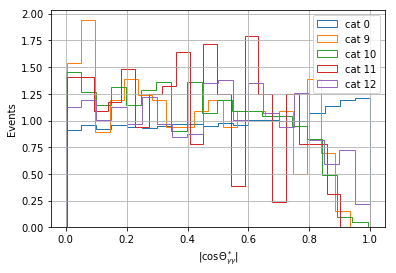

In [61]:
plt.figure(54)
gbycat=dfs["node_2"].groupby('cat')
dfc=gbycat.get_group(0)
np.abs(dfc.cos_theta_hgg).hist(bins=20,normed=True,histtype="step",label="cat %d" % 0) 
for icat in range(9,13):
    dfc=gbycat.get_group(icat)
    np.abs(dfc.cos_theta_hgg).hist(bins=20,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
plt.legend()
plt.show()
#plt.savefig("cos_theta_gg_category_9-12.png")

In [62]:
#hdf: hierarchial data format

for proc,df in dfs.items():
    df.to_hdf(proc+".hd5",proc,mode="w") #mode w: write

In [63]:
! ls *.hd5

node_10.hd5  node_13.hd5  node_4.hd5  node_7.hd5  node_box.hd5
node_11.hd5  node_2.hd5   node_5.hd5  node_8.hd5  node_SM.hd5
node_12.hd5  node_3.hd5   node_6.hd5  node_9.hd5


In [64]:
#checking boost stuff

subset= dfs["node_SM"][0:1][["leadJet_px","leadJet_py","leadJet_pz","leadJet_e","hbb_px","hbb_py","hbb_pz","hbb_e"]]
print subset
print ""

#daughter- LeadJet, parent- hbb
daughter=skp.LorentzVector(-108.967827,147.97934,-134.65498,227.87262)
parent=skp.LorentzVector(-138.614395,135.423813,-217.983994,317.328613)
daughter_vector=daughter.vector.unit()
parent_vector=parent.vector.unit()
print "angle between parent and daughter: ",np.degrees(parent_vector.angle(daughter_vector))
booster=parent.boostvector
negativebooster=(-booster.x,-booster.y,-booster.z)
daughter_boost1=daughter.boost(booster)
daughter_boost2=daughter.boost(negativebooster)
daughter_boost1_vector=daughter_boost1.vector.unit()
daughter_boost2_vector=daughter_boost2.vector.unit()

print "angle between parent and daughter_boost1: ",np.degrees(parent_vector.angle(daughter_boost1_vector))
print "angle between parent and daughter_boost2: ",np.degrees(parent_vector.angle(daughter_boost2_vector))
print ""
print "conclusion-booster boosts backward (angle increases), negative booster boosts forward (angle decreases)"

              leadJet_px  leadJet_py   leadJet_pz    leadJet_e     hbb_px  \
random_index                                                                
0            -112.894943 -132.638718  1055.658325  1069.941528 -95.123352   

                  hbb_py       hbb_pz        hbb_e  
random_index                                        
0            -122.297058  1123.035278  1140.542725  

angle between parent and daughter:  13.9223028783
angle between parent and daughter_boost1:  61.5810367216
angle between parent and daughter_boost2:  2.87104639853

conclusion-booster boosts backward (angle increases), negative booster boosts forward (angle decreases)
